In [71]:
import numpy as np
import pandas as pd

In [72]:
df=pd.read_csv(r"C:\Users\ozana\OneDrive\Masaüstü\teknasyon\teknasyon-case-ai-datascientist\datasets\sms_spam_train.csv")

In [73]:
df.head(20)

,Message,Label
0,Whats upp ac enisteee: -) senin memlekette bul...,ham
1,"Kampanya, VakifBank Worldcardla 31 Mayisa kada...",spam
2,I wont. So wat's wit the guys,ham
3,Bu arada son dakika evi düşürdük,ham
4,No that just means you have a fat head,ham
5,The battery is for mr adewale my uncle. Aka Egbon,ham
6,it to 80488. Your 500 free text messages are v...,spam
7,How come guoyang go n tell her? Then u told her?,ham
8,"I can. But it will tell quite long, cos i have...",ham
9,Playstation tercih ederim :),ham


In [74]:
df["Label"].value_counts()

Label
ham     6621
spam    3379
Name: count, dtype: int64

In [75]:
df.isnull().sum()

Message    0
Label      0
dtype: int64

In [76]:
df["Message Length"]=df["Message"].apply(len)

In [77]:
df.head()

,Message,Label,Message Length
0,Whats upp ac enisteee: -) senin memlekette bul...,ham,51
1,"Kampanya, VakifBank Worldcardla 31 Mayisa kada...",spam,228
2,I wont. So wat's wit the guys,ham,29
3,Bu arada son dakika evi düşürdük,ham,32
4,No that just means you have a fat head,ham,38


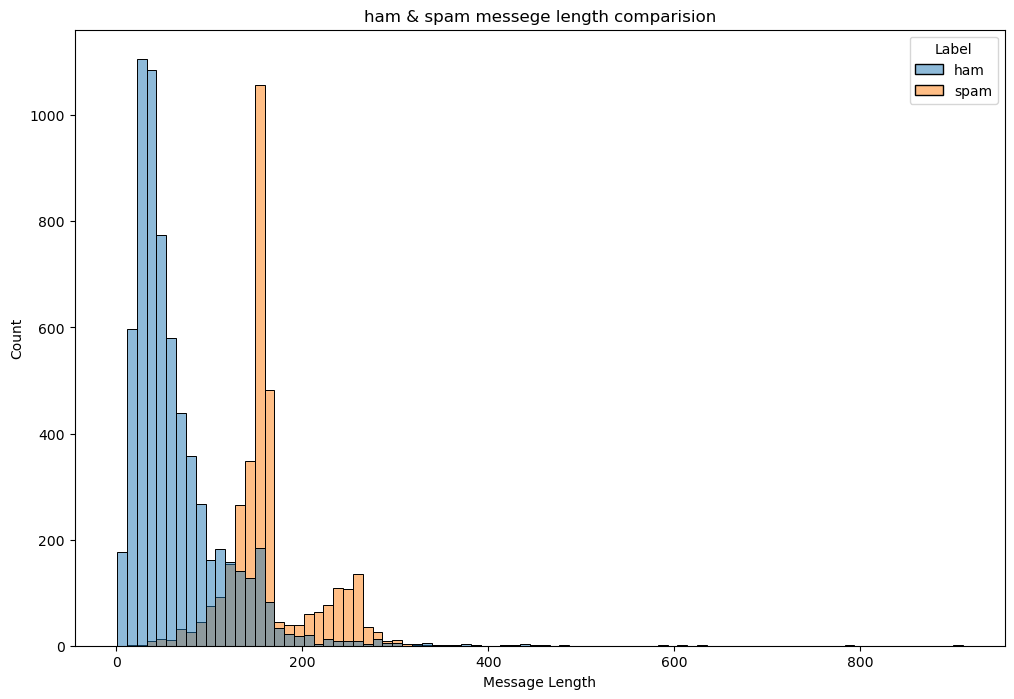

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=df["Message Length"],
    hue=df["Label"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [79]:
ham_desc=df[df["Label"]=="ham"]["Message Length"].describe()
spam_desc=df[df["Label"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("\n")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    6621.000000
mean       64.042441
std        53.765164
min         1.000000
25%        30.000000
50%        48.000000
75%        81.000000
max       910.000000
Name: Message Length, dtype: float64


Spam Message Length Description:
 count    3379.000000
mean      164.527375
std        46.609803
min        13.000000
25%       143.000000
50%       157.000000
75%       162.000000
max       453.000000
Name: Message Length, dtype: float64


In [80]:
df.describe(include="all")

,Message,Label,Message Length
count,10000,10000,10000.000000
unique,9668,2,NaN
top,"Sorry, I'll call later",ham,NaN
freq,25,6621,NaN
mean,NaN,NaN,97.996300
std,NaN,NaN,70.049824
min,NaN,NaN,1.000000
25%,NaN,NaN,38.000000
50%,NaN,NaN,80.000000
75%,NaN,NaN,153.000000


Classical NLP

In [70]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


# 1. Convert the labels: map "ham" to 0 and "spam" to 1
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# 2. Split the data into training and testing sets (80% train, 20% test)
X = df[['Message', 'Message Length']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Transformation:
#    a) For the "Message" column, use TF-IDF vectorization:
#       - lowercase=True converts all text to lowercase.
#       - token_pattern=r'\w+' extracts alphanumeric words.
#       - max_features=5000 limits the number of features.
#    b) For the "Message Length" column, apply MinMaxScaler to scale values between 0 and 1.
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    lowercase=True,
    token_pattern=r'\w+'
)

# Set sparse_threshold=0 to force a dense output matrix (required for some classifiers like Random Forest)
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf_vectorizer, 'Message'),
        ('scaler', MinMaxScaler(), ['Message Length'])
    ],
    remainder='drop',
    sparse_threshold=0
)

# 4. Define different algorithms to experiment with
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# 5. For each algorithm, create a pipeline, train the model, evaluate its performance, and save the model.
results = {}
for name, clf in models.items():
    print(f"=== {name} ===")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate the accuracy score
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # Print accuracy and detailed classification report
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    
    # Save the trained model; replace spaces with underscores in the filename
    model_filename = f"{name.replace(' ', '_').lower()}_spam_classifier.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Model saved as '{model_filename}'.\n")

print("All models evaluated. Results:")
print(results)


=== Logistic Regression ===
Accuracy: 0.9755
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1333
           1       0.98      0.94      0.96       667

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

Model saved as 'logistic_regression_spam_classifier.pkl'.

=== Multinomial Naive Bayes ===
Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1333
           1       0.97      0.90      0.93       667

    accuracy                           0.96      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000

Model saved as 'multinomial_naive_bayes_spam_classifier.pkl'.

=== Linear SVC ===
Accuracy: 0.9865
              precision    recall  f1-score   support

           0       0.98      1.00      0

Advanced (Transformer-Based) - Model Implementation Only (Requires GPU-Based Computation)

In [81]:
# Required libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModel, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# 1. Convert labels to numerical values: 'ham' -> 0, 'spam' -> 1
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# 2. Split data into training and test sets (80% training, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 3. Dataset Class: Tokenizing messages using mBERT tokenizer,
#    converting message length and label into tensors.
class SpamDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.dataframe = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        text = self.dataframe.loc[index, 'Message']
        msg_length = self.dataframe.loc[index, 'Message Length']
        label = self.dataframe.loc[index, 'Label']
        
        # Tokenization using mBERT
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        # Remove batch dimension using squeeze
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        # Add message length (scalar) and label
        item['message_length'] = torch.tensor(float(msg_length), dtype=torch.float)
        item['labels'] = torch.tensor(label, dtype=torch.long)
        return item

# 4. Model Definition: Combine embeddings from mBERT with message length for classification.
class SpamClassifier(nn.Module):
    def __init__(self, transformer_model_name="bert-base-multilingual-cased", num_labels=2):
        super(SpamClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(transformer_model_name)
        self.dropout = nn.Dropout(0.3)
        hidden_size = self.bert.config.hidden_size  # Typically 768
        # Combine mBERT output (hidden_size) with message length (1)
        self.classifier = nn.Linear(hidden_size + 1, num_labels)
    
    def forward(self, input_ids, attention_mask, message_length, labels=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # (batch_size, hidden_size)
        
        # Ensure message_length shape is (batch_size, 1)
        if message_length.dim() == 1:
            message_length = message_length.unsqueeze(1)
        
        # Concatenate embeddings with message length
        combined = torch.cat((pooled_output, message_length), dim=1)
        combined = self.dropout(combined)
        logits = self.classifier(combined)
        
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Create Tokenizer and Dataset Objects
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
train_dataset = SpamDataset(train_df, tokenizer, max_length=128)
test_dataset = SpamDataset(test_df, tokenizer, max_length=128)

# 6. Initialize Model
model = SpamClassifier(transformer_model_name=model_name, num_labels=2)

# 7. Define Training Parameters (Using Trainer API)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# 8. Create Trainer Object and Start Training Loop
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

print("Training started...")
trainer.train()
print("Training completed.")

# 9. Evaluate Model Performance
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)


C:\Users\ozana\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Training started...


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 